<a href="https://colab.research.google.com/github/Aryann29/Dog-Vs-Cat/blob/main/dogvscat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:36<00:00, 24.8MB/s]
100% 812M/812M [00:36<00:00, 23.2MB/s]


In [6]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
import os

path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [9]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.3870.jpg', 'dog.4663.jpg', 'dog.4844.jpg', 'cat.5287.jpg', 'cat.2499.jpg', 'dog.698.jpg', 'dog.3901.jpg', 'dog.440.jpg', 'cat.7339.jpg', 'cat.6813.jpg', 'dog.9606.jpg', 'dog.383.jpg', 'cat.7107.jpg', 'dog.3039.jpg', 'cat.10034.jpg', 'dog.5356.jpg', 'dog.10449.jpg', 'dog.4888.jpg', 'cat.7507.jpg', 'dog.2728.jpg', 'cat.9870.jpg', 'dog.5486.jpg', 'dog.840.jpg', 'dog.2064.jpg', 'cat.2929.jpg', 'dog.1403.jpg', 'cat.1814.jpg', 'dog.6820.jpg', 'dog.881.jpg', 'dog.12278.jpg', 'cat.2606.jpg', 'dog.5801.jpg', 'cat.5543.jpg', 'dog.6795.jpg', 'dog.5624.jpg', 'dog.6918.jpg', 'cat.1539.jpg', 'cat.3247.jpg', 'cat.11519.jpg', 'cat.1413.jpg', 'cat.8481.jpg', 'cat.9233.jpg', 'dog.2358.jpg', 'cat.594.jpg', 'dog.11723.jpg', 'cat.7679.jpg', 'cat.11391.jpg', 'dog.5132.jpg', 'dog.12045.jpg', 'cat.8674.jpg', 'dog.5976.jpg', 'cat.5130.jpg', 'cat.10199.jpg', 'cat.11324.jpg', 'cat.483.jpg', 'cat.6579.jpg', 'cat.1515.jpg', 'cat.6762.jpg', 'dog.2540.jpg', 'dog.621.jpg', 'dog.4892.jpg', 'dog.9598.jpg', 'dog.1

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

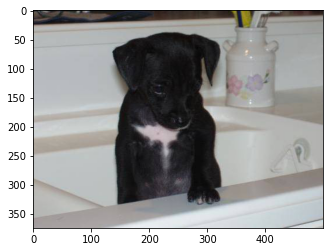

In [11]:
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

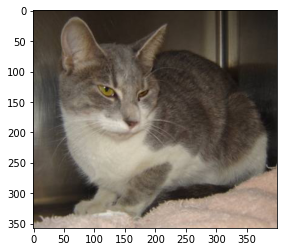

In [12]:
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [13]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])



dog
dog
dog
cat
cat


In [14]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [15]:
os.mkdir('/content/image resized')

In [16]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

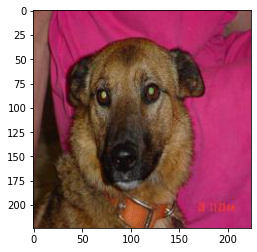

In [24]:
img = mpimg.imread('/content/image resized/dog.3870.jpg')
imgplt = plt.imshow(img)
plt.show()

In [20]:
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [21]:
print(filenames[0:5])
print(len(filenames))

['dog.3870.jpg', 'dog.4663.jpg', 'dog.4844.jpg', 'cat.5287.jpg', 'cat.2499.jpg']
2000


In [23]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 0, 0]
2000


In [25]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 968 1032]


In [26]:
import cv2
import glob

In [27]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [28]:
print(dog_cat_images)

[[[[ 70  84 136]
   [ 71  85 137]
   [ 72  86 139]
   ...
   [ 78  83 128]
   [ 80  83 128]
   [ 79  82 126]]

  [[ 72  86 138]
   [ 73  87 139]
   [ 74  88 141]
   ...
   [ 80  85 130]
   [ 82  85 130]
   [ 82  85 129]]

  [[ 75  89 142]
   [ 75  89 142]
   [ 76  90 143]
   ...
   [ 83  88 133]
   [ 85  88 133]
   [ 85  88 132]]

  ...

  [[ 37  59  95]
   [ 48  70 106]
   [ 60  79 116]
   ...
   [112  40 182]
   [112  40 182]
   [112  40 182]]

  [[ 39  62 100]
   [ 43  66 104]
   [ 49  71 107]
   ...
   [112  40 182]
   [112  40 182]
   [112  40 182]]

  [[ 37  60  98]
   [ 36  59  97]
   [ 38  60  96]
   ...
   [111  39 181]
   [112  40 182]
   [112  40 182]]]


 [[[207 217 224]
   [200 210 217]
   [206 216 223]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[207 217 224]
   [200 210 217]
   [204 214 221]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[212 220 227]
   [203 211 218]
   [205 212 221]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [29]:
type(dog_cat_images)

numpy.ndarray

In [30]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [46]:
#spliting data
X = dog_cat_images
Y = np.asarray(labels)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [47]:
#scaling
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [35]:
print(X_train_scaled)

[[[[0.09803922 0.11764706 0.10980392]
   [0.09803922 0.11764706 0.10980392]
   [0.09803922 0.1254902  0.11372549]
   ...
   [0.32156863 0.46666667 0.28627451]
   [0.27843137 0.41960784 0.23921569]
   [0.27843137 0.41960784 0.23921569]]

  [[0.10196078 0.12156863 0.11372549]
   [0.09803922 0.11764706 0.10980392]
   [0.09411765 0.12156863 0.10980392]
   ...
   [0.40392157 0.54901961 0.36862745]
   [0.34117647 0.48235294 0.30196078]
   [0.29803922 0.43921569 0.25882353]]

  [[0.11764706 0.1372549  0.13333333]
   [0.10980392 0.12941176 0.1254902 ]
   [0.10588235 0.1254902  0.12156863]
   ...
   [0.40784314 0.55294118 0.37254902]
   [0.34901961 0.49411765 0.31372549]
   [0.30588235 0.45098039 0.27058824]]

  ...

  [[0.31764706 0.54509804 0.31764706]
   [0.31764706 0.53333333 0.30980392]
   [0.34901961 0.55686275 0.33333333]
   ...
   [0.30588235 0.54509804 0.31764706]
   [0.29803922 0.5372549  0.30980392]
   [0.29411765 0.53333333 0.30588235]]

  [[0.30196078 0.5254902  0.30980392]
   [0.3

In [36]:
import tensorflow as tf
import tensorflow_hub as hub

In [38]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [39]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [40]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [41]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 13s 42ms/step - loss: 0.2358 - acc: 0.8975
Epoch 2/5
50/50 [==============================] - 2s 39ms/step - loss: 0.0723 - acc: 0.9750
Epoch 3/5
50/50 [==============================] - 2s 39ms/step - loss: 0.0594 - acc: 0.9837
Epoch 4/5
50/50 [==============================] - 2s 40ms/step - loss: 0.0425 - acc: 0.9906
Epoch 5/5
50/50 [==============================] - 2s 41ms/step - loss: 0.0358 - acc: 0.9906


In [42]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 1s 67ms/step - loss: 0.0524 - acc: 0.9800
Test Loss = 0.05244309455156326
Test Accuracy = 0.9800000190734863


Path of the image to be predicted: /content/image resized/cat.10048.jpg


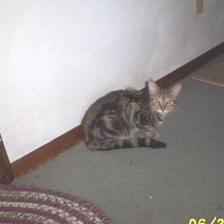

1/1 [==============================] - 0s 27ms/step
[[ 0.4489894 -3.1346302]]
0
The image represents a Cat


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')